# Simple Price Expectation Agent

This is "scratchwork area" for a three-period agent who must take into account the price of assets one period ahead. 

This is making the first basic extension to the "dividend-only" agent by adding a single period to the beginning of the agent problem. 

Here is the agent problem:

$$
\begin{aligned}
\underset{\xi_1, \xi_2}{\mathrm{max}} & \;\; u(c_{0}) + \beta \mathbb{E}\left[u(c_{1})\right]  + \beta^2 \mathbb{E}\left[u(c_{2})\right] \\
c_0 & = y_0 + (\xi_0 - \xi_1)p_0 \\ 
c_1 & = \xi_1 d_1 + (\xi_1 - \xi_2)p_1 \\ 
c_{2} & = \xi_2 d_2 \\
c_{t} & \ge 0 \forall t \\
\xi_{t+1} & \ge -\xi_{t} \forall t
\end{aligned}
$$


Note that there is no short-selling allowed and consumption cannot go negative. The final period of life is $T=2$. We can break this into two problems: the problem for period $t = T-1 = 1$ and for $t = T-2=0$.

For $T-1$ the problem is the same as the dividend-only problem:

$$
\begin{aligned}
\underset{\xi_2}{\mathrm{max}} & \;\; u(c_{1})  + \beta \mathbb{E}\left[u(c_{2})\right] \\
c_1 & = \xi_1 d_1 + (\xi_1 - \xi_2)p_1 \\ 
c_{2} & = \xi_2 d_2 \\
c_{t} & \ge 0 \forall t \\
\xi_{t+1} & \ge -\xi_{t} \forall t
\end{aligned}
$$

In period $T-1$ the price $p_1$ will always be known to the agent. 

Substitute the constraints into the objective, take first derivative and set to zero to find the Euler and we arive at the familiar expression:

$$
\begin{aligned}
u'(c_1)p_1 = \beta \mathbb{E}\left[u'(c_{2}) d_2 \right]
\end{aligned}
$$

For CRRA utility this is straightforward to solve algebraically for $\xi_2$:


Log CRRA:

$$
\begin{aligned}
\tilde{\xi_2} = \xi_1 \frac{d_1+p_1}{p_1} \frac{\beta}{1 + \beta}
\end{aligned}
$$


Non-Log CRRA:

$$
\begin{aligned}
\tilde{\xi_2}  = \frac{\xi_1 (d_1 + p_1)}{\left( \frac{\beta}{p_1} \mathbb{E}\left[ d_2^{1-\rho} \right] \right)^{-1/\rho} + p_1}
\end{aligned}
$$

Note that the solutions simply tie the choice $\xi_2$ to already known values and the expected values of $d_2$ at time 2.

The tilde "~" above the the demand indicates that this is unrestricted demand -- we impose the two constraints as follows:

$$
\begin{aligned}
\xi_2 = \min(\xi_1 + \frac{\xi_1 d_1}{p_1}, \max(\tilde{\xi_2}, 0.0))
\end{aligned}
$$


We can examine these two demand functions easily:


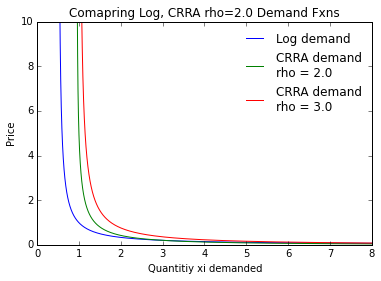

In [7]:
%matplotlib inline
from __future__ import division
import pylab as plt
import numpy as np


# Parameters:
beta = 0.99
rho = 2.0
rho3 = 3.0
xi1 = 0.85
d1 = 1.0
y0=1.0
xi0=1.0

D_vals = np.array([0.01, 0.7, 1.2, 1.7, 1.99])
D_probs = np.array([0.5, 3.0, 5.0, 3.0, 0.5])

# Normalize D_probs...
D_probs = D_probs/float(np.sum(D_probs))


# Define two demand functions:
def log_demand_Tm1(xi1, d1, p1, beta):
    xi2 = ((xi1 * d1) / p1 + xi1) * beta/(1.0 + beta)
    return max( min(xi1 + xi1*d1/p1, xi2), 0.0)

def crra_demand_Tm1(xi1, d1, p1, beta, rho, D_vals, D_probs):
    xi2  = xi1 * (d1 + p1) / ( ((beta / p1) * np.dot(D_vals**(1.0-rho), D_probs) )**(-1.0/rho) + p1)
    return max( min(xi1 + xi1*d1/p1, xi2), 0.0)





# Define some prices:
prices = np.linspace(0.01,10,1000)


log_demands = []
crra_demands = []
crra_demands_rho3 = []

for p1 in prices:
    log_demands.append( log_demand_Tm1(xi1, d1, p1, beta) )
    crra_demands.append( crra_demand_Tm1(xi1, d1, p1, beta, rho, D_vals, D_probs))
    crra_demands_rho3.append( crra_demand_Tm1(xi1, d1, p1, beta, rho3, D_vals, D_probs))

# Plot against prices:
plt.plot(log_demands, prices, label="Log demand")
plt.plot(crra_demands, prices, label="CRRA demand\nrho = "+str(rho))
plt.plot(crra_demands_rho3, prices, label="CRRA demand\nrho = "+str(rho3))
plt.xlabel("Quantitiy xi demanded")
plt.ylabel("Price")
plt.xlim([0.0, 8.0])
plt.legend(loc='best', frameon=False)
plt.title("Comapring Log, CRRA rho="+str(rho)+" Demand Fxns")
plt.show()


## Simple Asset Pricing with Heterogeneity


The $T-1$ problem is the simplest problem we can construct to begin thinking about important aspects of asset pricing under agent heterogeneity. 

Because the agent does not care about price in the next (final) period, this problem is in a sense "stripped to the basic structure" -- all that matters are:

* agent preferences
* agent wealth
* agent beliefs about dividend payoff tomorrow

We will see that this simple, stripped-down problem none-the-less gives us a great platform to think about important elements of modeling heterogeneous agents, including:

* heterogeneity in wealth
* heterogeneity in beliefs
* heterogeneity in preferences
* learning
* general equilibrium effects of all of the above.

We will explore these properties in a series of computational experiments. 

First, however, construct a very basic "One-Period, Dividends-Only" asset pricing agent:


# WHERE AT: HERE. BUILD/PULL IN THE ASSET-PRICING AGENT!



## The T-2 Problem

The $T-1$ problem is simply the full agent problem as before:

$$
\begin{aligned}
\underset{\xi_1, \xi_2}{\mathrm{max}} & \;\; u(c_{0}) + \beta \mathbb{E}\left[u(c_{1})\right]  + \beta^2 \mathbb{E}\left[u(c_{2})\right] \\
c_0 & = y_0 + (\xi_0 - \xi_1)p_0 \\ 
c_1 & = \xi_1 d_1 + (\xi_1 - \xi_2)p_1 \\ 
c_{2} & = \xi_2 d_2 \\
c_{t} & \ge 0 \forall t \\
\xi_{t+1} & \ge -\xi_{t} \forall t
\end{aligned}
$$

Only now the agent knows the form of their demand function for $\xi_2$ in period $T-1$, as obtained from above. 

In addition, when we solve the Euler for $\xi_1$ we see that the period-$T$ calculations fall out and we arrive again at a familiar Euler formulation:

$$
u'(c_0)p_0 = \beta \mathbb{E}\left[u'(c_{1}) (d_1 + p_1) \right]
$$

Solving this problem for demand $\xi$ becomes algebraically complicated for non-log CRRA utility. However we can directly solve the Euler above numerically for $xi$ as long as we are careful about possible numerical instabilities. 

To illustrate a possible numerical instability, observe that a naive numerical solution would be as follows. Define a function for the LHS and RHS of the above Euler, and simply numerically find where they cross: 

$$
\begin{aligned}
\textrm{LHS}(\xi_1 \mid y_0, \xi_0, p_0, \Theta) & \equiv u'(c_0)p_0 \\
\textrm{RHS}(\xi_1 \mid \Theta, \Omega) & \equiv \beta \mathbb{E}\left[u'(c_{1}) (d_1 + p_1) \right] \\
\textrm{G}(\xi_1 \mid y_0, \xi_0, p_0, \Theta, \Omega) & \equiv \textrm{LHS}(\xi_1 \mid \Theta, y_0, \xi_0, p_0) - \textrm{RHS}(\xi_1 \mid \Theta, \Omega)
\end{aligned}
$$

where $\Theta = (\rho, \beta)$ and $\Omega$ is agent beliefs about $d_1, p_1, d_2$.

A naive solution for $\xi_1$ is to numerically root find on the function $\textrm{G}(\xi_1 | \Theta, y_0, \xi_0, p_0, \Omega) = 0$.

This has a problem, however, in that the region in which the LHS and RHS of the Euler cross is highly non-linear. Observe:


In [8]:
# Define some p-probs as well:
p_vals = np.array([0.1, 0.7, 1.2, 1.7, 1.9])
p_probs = np.array([1.0, 3.0, 5.0, 3.0, 1.0])

# Normalize...
p_probs = p_probs/float(np.sum(p_probs))


# Define some utility functions:
if rho == 1.0:
    u = np.log
    uprime = lambda c: 1.0/c
    uprimeprime = lambda c: -c**(-2)
    uprime_inverse = lambda z: 1.0/z
elif rho == 0.0:
    # Then constant utility - risk neutral
    u = lambda c: c
    uprime = lambda c: 1.0
    uprimeprime = lambda c: 0.0
    uprime_inverse = None # Not defined for constant function
else:
    # The "regular" CRRA
    u = lambda c, oneminusrho=(1.0-rho): c**oneminusrho / oneminusrho
    uprime = lambda c, rho=rho: c**-rho
    uprimeprime = lambda c, rho=rho: -rho*c**(-1.0-rho)
    uprime_inverse = lambda z, rhoinv=(1.0/rho): z**-rhoinv

    

# Construct a joint distribution between d1 and p1 values;
# note that this assumes d1, p1 are independent:
dp_vals = []
dp_probs = []
d_combo_vals = []
p_combo_vals = []
dp_both_vals = []

for d, pr_d in zip(D_vals, D_probs):
    for p, pr_dp in zip(p_vals, p_probs):
        d_combo_vals.append(d)
        p_combo_vals.append(p)
        dp_both_vals.append( (d, p) )
        dp_probs.append(pr_d * pr_dp)
        

print "Test sum:", np.sum(dp_probs)




Test sum: 1.0


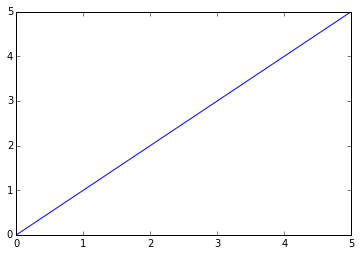

In [9]:
# Define the LHS and RHS of the Euler:
def LHS_Tm2(y0, xi0, xi1, p0):
    c0 = y0 + (xi0 - xi1) * p0
    return uprime(c0)*p0

# Create some prices over which to examine LHS:
prices = np.linspace(0.01,5,100)
LHS = []
for p in prices:
    LHS.append(LHS_Tm2(y0, xi0, xi1, p))
plt.plot(prices, LHS)
plt.show()






In [ ]:
def crra_demand_Tm1(xi1, d1, p1, beta, rho, D_vals, D_probs):
    xi2  = xi1 * (d1 + p1) / ( ((beta / p1) * np.dot(D_vals**(1.0-rho), D_probs) )**(-1.0/rho) + p1)
    return max( min(xi1 + xi1*d1/p1, xi2), 0.0)


def RHS_Tm2(xi1, d1, p1, beta, rho, D_vals, D_probs, D_vals, D_probs):

    def uprime_tp1(xi1, d1, p1, beta, rho, d2_vals, d2_probs):
        xi2 = crra_demand_Tm1(xi1, d1, p1, beta, rho, d2_vals, d2_probs)
        c1 = xi1 * d1 + (xi1 - xi2) * p1
        return c1
    EVals = []
    for 
    
    beta * np.dot( , )
    return max( min(xi1 + xi1*d1/p1, xi2), 0.0)


In [12]:
print crra_demands
print log_demands


[18.781529106267172, 12.452851451245515, 9.7332641211529332, 8.1535068120514875, 7.1000325267337434, 6.338596511800195, 5.7582283923948649, 5.2988475930348296, 4.9248015043159477, 4.6134626473887179, 4.3497111347412574, 4.1230230474645166, 3.9258265484803161, 3.7525219858769105, 3.5988711371914115, 3.4616020376867742, 3.3381450389946998, 3.2264516258517451, 3.1248670422207279, 3.0320388504798763, 2.9468500570124769, 2.8683693875031717, 2.7958137600070474, 2.7285195806846616, 2.6659205187008155, 2.6075301054651132, 2.5529279716506119, 2.5017488591800623, 2.453673772664839, 2.4084227966189591, 2.365749221506158, 2.3254347068984376, 2.2872852729353483, 2.2511279581993455, 2.2168080174657399, 2.1841865596473613, 2.1531385468433748, 2.1235510913097171, 2.0953219995522874, 2.0683585224525505, 2.0425762779975791, 2.0178983192722724, 1.9942543252341276, 1.9715798956982955, 1.949815935117575, 1.9289081123055722, 1.9088063853433372, 1.8894645826250287, 1.8708400324107037, 1.8528932344226021, 1.8

In [20]:
plt.legend?

Log CRRA:

$$
\begin{aligned}
u'(\xi_1 d_1 + (\xi_1 - \xi_2)p_1) p_1 =

\xi_2  = (\xi_1 d_1) / p_1 + \xi_1 - 1/(beta E[1 / \xi_2 ])


u'( xi1 * d1 + (xi1 - xi2) * p1  ) * p1 = beta E[ u'( xi2 * d2 ) * d2 ]

1 / ( xi1 * d1 + (xi1 - xi2) * p1  ) * p1 = beta E[ 1 / ( xi2 * d2 ) * d2 ]

1 / ( xi1 * d1 + (xi1 - xi2) * p1  ) * p1 = beta * 1 / ( xi2 ) 

( xi2 / beta)  * p1 = xi1 * d1 + (xi1 - xi2) * p1

xi2 = ((xi1 * d1) / p1 + xi1 - xi2) * beta


xi2 * (1 + beta) = ((xi1 * d1) / p1 + xi1) * beta


xi2 = ((xi1 * d1) / p1 + xi1) * beta/(1 + beta)



\end{aligned}
$$



non-log CRRA:


$$
\begin{aligned}
u'(c_1)p_1 = \beta \mathbb{E}\left[u'(c_{2}) d_2 \right]

u'( xi1 * d1 + (xi1 - xi2) * p1  ) * p1 = beta E[ u'( xi2 * d2 ) * d2 ]

( xi1 * d1 + (xi1 - xi2) * p1  )^-rho * p1 = beta E[ ( xi2 * d2 )^-rho * d2 ]

( xi1 * d1 + (xi1 - xi2) * p1  )^-rho  = (beta / p1) * E[ ( xi2 * d2 )^-rho * d2 ]

( xi1 * d1 + (xi1 - xi2) * p1  )^-rho  = (beta / p1) * E[ ( xi2 * d2 )^-rho * (d2^-(1/rho))^-rho ]

( xi1 * d1 + (xi1 - xi2) * p1  )^-rho  = (beta / p1) * E[ ( xi2 *  d2^(1-(1/rho)) )^-rho ]

( xi1 * d1 + (xi1 - xi2) * p1  )^-rho  = (beta / p1) * E[  xi2^-rho *  (d2^(1-(1/rho)) )^-rho ]

( xi1 * d1 + (xi1 - xi2) * p1  )^-rho  = (beta / p1) * xi2^-rho * E[ (d2^(1-(1/rho)) )^-rho ]

(( xi1 * d1 + (xi1 - xi2) * p1  )^-rho) / xi2^-rho  = (beta / p1) * E[ d2^(1-rho) ]

( (( xi1 * d1 + (xi1 - xi2) * p1) / xi2  )^-rho)  = (beta / p1) * E[ d2^(1-rho) ]

( ( ( xi1 * d1 + xi1 * p1 - xi2 * p1) / xi2  )^-rho)  = (beta / p1) * E[ d2^(1-rho) ]

( ( ( xi1 * (d1 + p1) - xi2 * p1) / xi2  )^-rho)  = (beta / p1) * E[ d2^(1-rho) ]

( ( xi1 * (d1 + p1) / xi2 -  p1  )^-rho)  = (beta / p1) * E[ d2^(1-rho) ]

xi1 * (d1 + p1) / xi2 -  p1  = ((beta / p1) * E[ d2^(1-rho) ])^(-1/rho)


xi1 * (d1 + p1) / xi2  = ((beta / p1) * E[ d2^(1-rho) ])^(-1/rho) + p1


xi2  = xi1 * (d1 + p1) / (((beta / p1) * E[ d2^(1-rho) ])^(-1/rho) + p1)


\end{aligned}
$$



